# Finance Data Project (2008 financial Crisis)

In this data project I have focused on exploratory data analysis of stock prices. {This project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice}
____

____
I have focused on bank stocks and shown how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2019.

## Getting the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas


*Note: (https://github.com/pydata/pandas-datareader) Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Used these links for install guidance (**pip install pandas-datareader**)*

### The Imports


In [41]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. I have taken stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** I've taken the stock data from Jan 1st 2006 to Jan 1st 2019 for each of these banks. Then set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This involves a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Used [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions**
   

In [42]:
pip install yahoo-finance

Note: you may need to restart the kernel to use updated packages.


In [43]:
start_date = '2006-1-1'
end_date = '2019-1-1'

BAC = data.DataReader("BAC", "yahoo", start_date, end_date)
C = data.DataReader("C", "yahoo", start_date, end_date)
GS = data.DataReader("GS", "yahoo", start_date, end_date)
JPM = data.DataReader("JPM", "yahoo", start_date, end_date)
MS = data.DataReader("MS", "yahoo", start_date, end_date)
WFC = data.DataReader("WFC", "yahoo", start_date, end_date)

**Created a list of the ticker symbols (as strings) in alphabetical order. Called this list: tickers**

In [44]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"] 

**Used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Have set the keys argument equal to the tickers list.**

In [45]:
bank_stocks= pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

**Set the column name levels**

In [46]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Checked the head of the bank_stocks dataframe.**

In [47]:
bank_stocks.head(5)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.297882  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.336124  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.731342  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

# EDA

Explored the data a bit!
[Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Refered the solutions to use .xs(), since that will be a major part of this project.

**What is the max Close price for each bank's stock throughout the time period?**

In [48]:
bank_stocks.xs(key='Close', level='Stock Info' ,axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

**Created a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [49]:
returns= pd.DataFrame()

**Used pandas pct_change() method on the Close column to create a column representing this return value. Created a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [50]:
for ticker in tickers:
    returns[ticker+" Return"]= bank_stocks.xs((ticker,'Close'), axis=1).pct_change()
    
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

**Created a pairplot using seaborn of the returns dataframe.**

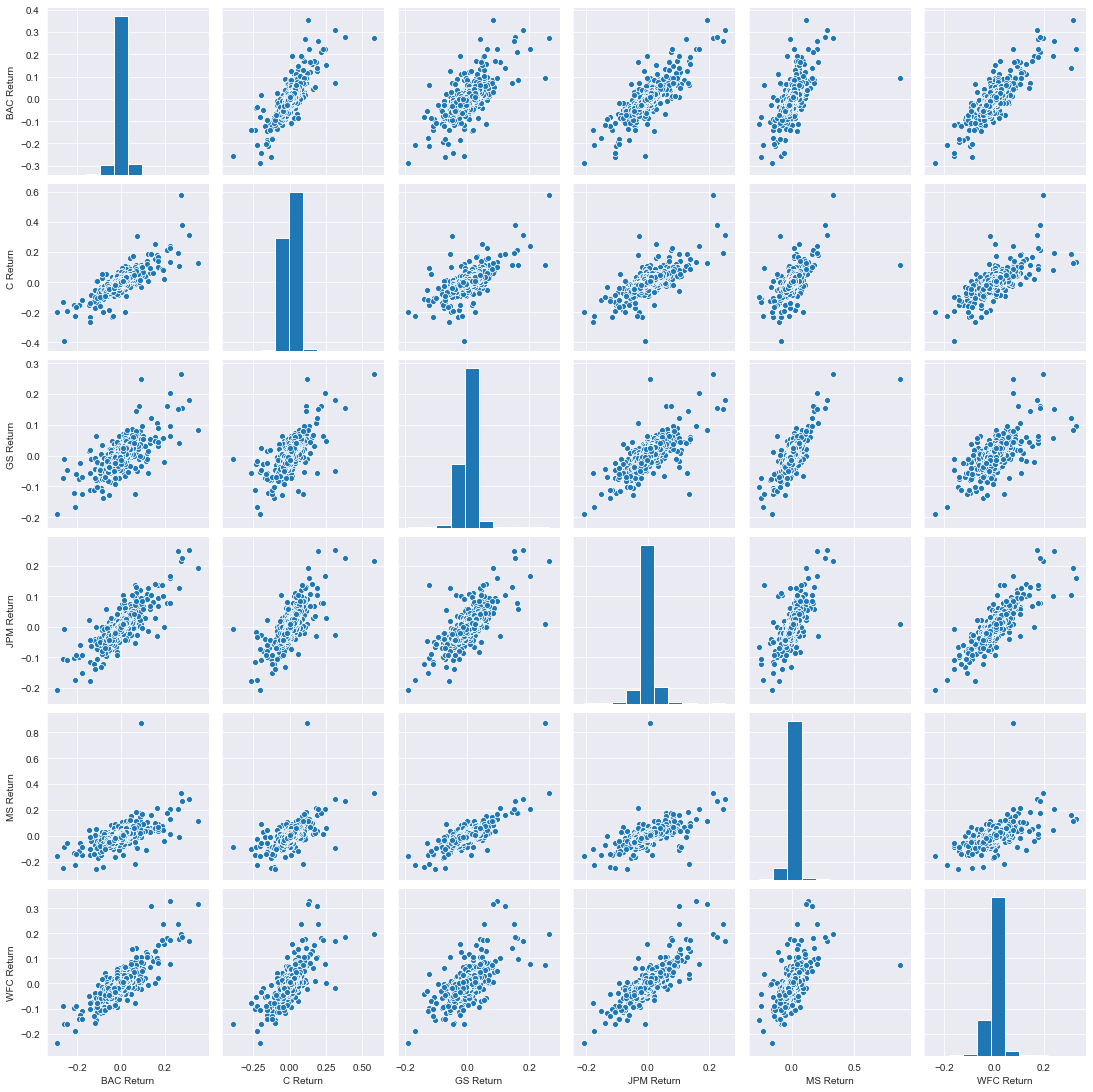

In [51]:
sns.set_style("darkgrid")
sns.pairplot(data= returns)

**Background on [Citigroup's Stock Crash available here.]**(https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

**We also see the enormous crash in value if we take a look a the stock price plot (which I have done later in the visualizations.)**

**Using this returns DataFrame, figured out on what dates each bank stock had the best and worst single day returns. Noticed that 4 of the banks share the same day for the worst drop**

In [52]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**Noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

In [53]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

**Taking a look at the standard deviation of the returns, which stock to classify as the riskiest over the entire time period? Which would we classify as the riskiest for the year 2015?**

In [54]:
returns.std()

BAC Return    0.033128
C Return      0.034764
GS Return     0.023453
JPM Return    0.025108
MS Return     0.034189
WFC Return    0.027339
dtype: float64

In [55]:
returns.loc['2015-01-01':'2016-1-1'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Created a distplot using seaborn of the 2015 returns for Morgan Stanley**

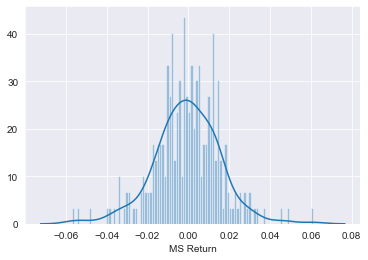

In [56]:
sns.distplot(returns.loc['2015-01-01':'2016-1-1']['MS Return'], bins=100)

**Created a distplot using seaborn of the 2008 returns for CitiGroup**

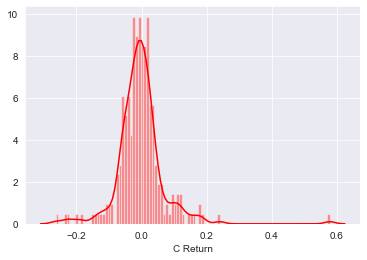

In [57]:
sns.distplot(returns.loc['2008-01-01':'2009-01-01']['C Return'], color='red', bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Preferred visualization libraries to try to recreate the described plots below: seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Created a line plot showing Close price for each bank for the entire index of time.**

In [59]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).iplot()

## Moving Averages

Analyzed the moving averages for these stocks in the year 2008. 

**Plotted the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [60]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).loc['2008-01-01':'2009-01-01']['BAC'].iplot()

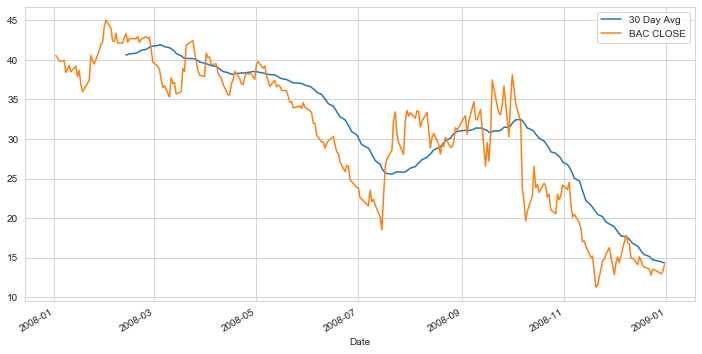

In [61]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Created a heatmap of the correlation between the stocks Close Price.**

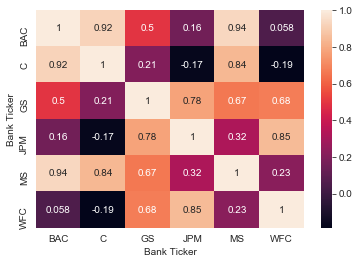

In [62]:
close_corr = bank_stocks.xs(key='Close',level='Stock Info' , axis=1).corr()
sns.heatmap(data=close_corr, annot=True)

**Used seaborn's clustermap to cluster the correlations together:**

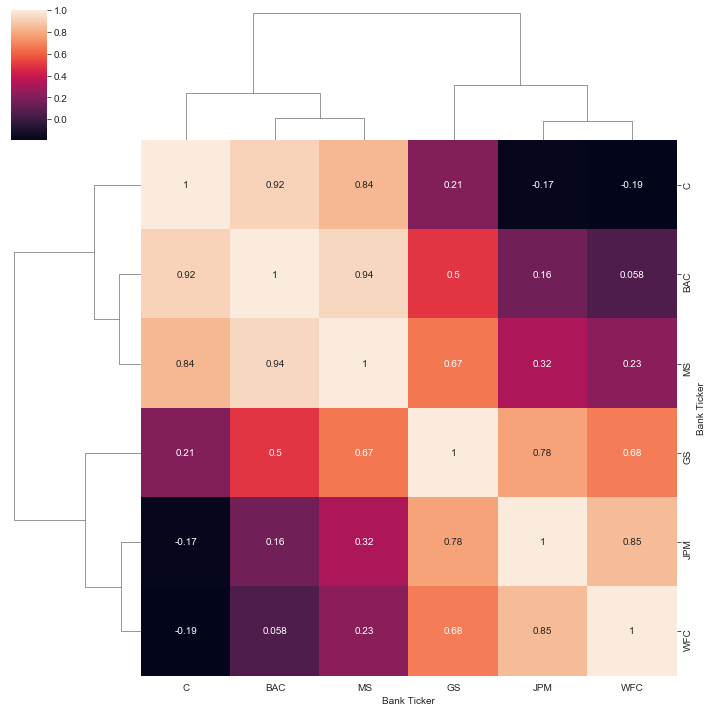

In [63]:
sns.clustermap(data=close_corr, annot= True)

### In this part of the project I have relyed on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

**Created a candle plot of Bank of America's stock from Jan 1st 2018 to Jan 1st 2019. Used .iplot(kind='candle)**

In [64]:
BAC.loc['2018-01-01':'2019-01-01'].iplot(kind='candle')

**Created a Simple Moving Averages plot of Morgan Stanley for the year 2018. Used .ta_plot(study='sma')**

In [65]:
MS.loc['2018-01-01':'2019-01-01'].ta_plot(study='sma')

**Created a Bollinger Band Plot for Bank of America for the year 2015. Used .ta_plot(study='boll')**

In [66]:
BAC['2018-01-01':'2019-01-01'].ta_plot(study='boll')

# Thank you!